# Project: Wrangling and Analyze Data

## Data Gathering


In [256]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import json
from IPython.display import Image

### 1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)

In [257]:
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

### 2. Tweet image predictions (image_predictions.tsv)
Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [258]:
#Getting the URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#To view the raw data
response=requests.get(url)
with open ('image-prediction.tsv',mode='wb')as file:
    file.write(response.content)
    
image_prd=pd.read_csv('image-prediction.tsv',sep='\t') 


### 3. Additional data via the Twitter API (tweet_json.txt)
because I did't have access to Twitter API, I used 'tweet-json.txt' file provided by Udacity, I put twitter data wrangling code below as a comment 

In [259]:
import tweepy #twitter api
#keys and token to access the API
consumer_key = 'EMPTIED'
consumer_secret = 'EMPTIED'
access_token = 'EMPTIED'
access_secret = 'EMPTIED'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


#--------- to read the same data from 'tweet-json.txt' file -------------
list_tweet=[]
with open ('tweet-json.txt')as file:
    for line in file:
        list_tweet.append(json.loads(line))
        
tweet_data=pd.DataFrame(list_tweet,columns=['id','retweet_count','favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [260]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stanley. He likes road trips. Will shift for you. One ear more effective than other. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957897576449/photo/1,13,10,Stanley,None,None,None,None
1791,677335745548390400,NaN,NaN,2015-12-17 03:53:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,NaN,NaN,NaN,https://vine.co/v/hbLbH77Ar67,12,10,None,None,None,None,None
1405,699323444782047232,NaN,NaN,2016-02-15 20:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""I'm bathing the children what do you want?"" ...both 10/10 https://t.co/Rizm1LWh4z",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699323444782047232/photo/1,10,10,None,None,None,None,None
1707,680801747103793152,NaN,NaN,2015-12-26 17:25:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Great picture here. Dog on the right panicked &amp; forgot about his tongue. Middle green dog mu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680801747103793152/photo/1,10,10,None,None,None,None,None
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He dug a hole and then sat in it because why not. Unamused by the bath that follow...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/808501579447930884/photo/1,https://twitter.com/dog_rates/st...",12,10,Koda,None,None,None,None
238,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unbelievable... We. Only. Rate. Dogs. Please stop sending in other things like this Blossoming F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187444137987/photo/1,11,10,None,None,None,None,None
2071,671115716440031232,NaN,NaN,2015-11-29 23:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling to...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671115716440031232/photo/1,6,10,Phred,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Sephie. According to this picture, she can read. Fantastic at following directions. 11/1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872357261312/photo/1,11,10,Sephie,None,None,None,None
2072,671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016219725825/photo/1,8,10,Toby,None,None,None,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ito. He'll be your uber driver tonight. Currently adjusting the mirrors. 13/10 incredibl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249661788160/photo/1,13,10,Ito,None,None,None,None


Issues:
* Source column contain unnecessary URL and HTML code, required to extract device name only
* text contain URL, we should remove it later
* Unnecessary columns like: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id	retweeted_status_timestamp and expanded_urls
* Dog stages in different column, should be in one column
* some of denomerator are less than 10
* Data contains Retweeted tweet, we will remove it later to keep only original tweets

In [261]:
image_prd.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire_bullterrier,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True
1167,735648611367784448,https://pbs.twimg.com/media/CjWMezdW0AErwU3.jpg,1,Pembroke,0.462594,True,seat_belt,0.261854,False,Cardigan,0.151698,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
1805,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,1,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,0.021190,True
240,670442337873600512,https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg,1,Sussex_spaniel,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English_setter,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False


Issues:
* multiple predection and confedence columns, must be reduced to two columns

In [262]:
tweet_data.sample(5)

,id,retweet_count,favorite_count
28,886366144734445568,3316,21524
1206,715704790270025728,634,3055
1023,746369468511756288,1854,6637
1353,703611486317502464,1709,4229
375,828046555563323392,3260,12923


### Programatic Assissment

Fisrt, I would to see if there are missing values, wrong data types  and so on

In [263]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

there are wrong data types:
* tweet_id int -> string
* timestamp object -> timestamp



In [264]:
#checking for null (missing values)
df_archive.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

* 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp' and 'expanded_urls' have missing data, but we not interested to them as we will drop them later, we will keep the original tweets only 


In [265]:
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

as we seen above, names like "None", "a", "the", "by" and "an" all are wrong names, we will remove them later in data assessing step

In [266]:
df_archive.tweet_id.duplicated().sum()

0

do duplication in this data 

In [267]:
df_archive.shape[0] , df_archive.tweet_id.nunique()

(2356, 2356)

this also prove that no duplication in the data, so the length of data is 2356

there are no duplicate tweets in the data

I want to see if there numerator below 10

In [268]:
df_archive.loc[:,'rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

the smallsmallest numerator I found it is zero, and largest one is 1776 

In [269]:
df_archive.loc[:,'rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

the denominator must be 10, so I will standardize all other to 10 

In [270]:
print('count of doggo: {}'.format(df_archive.query("doggo =='doggo'")['doggo'].count()))
print('count of floofer: {}'.format(df_archive.query("floofer =='floofer'")['floofer'].count()))
print('count of pupper: {}'.format(df_archive.query("pupper =='pupper'")['pupper'].count())) 
print('count of puppo: {}'.format(df_archive.query("puppo =='puppo'")['puppo'].count()))

count of doggo: 97
count of floofer: 10
count of pupper: 257
count of puppo: 30


In [271]:
# percenrage of dog size classified are:
classified = (97 + 10 + 257 + 30) / df_archive.shape[0]
print('dog size classified take {:.2%} percenrage of our dataframe '.format(classified))

dog size classified take 16.72% percenrage of our dataframe 


### Quality issues
1. Datatype of 'timestamp' in 'df_archive' object not date

2. Datatype of 'tweet_id' in 3 datasets int not object(string)

3. Change 'name' in 'df_archive' to lowercase

4. Reduce predection and confidence columns in 'image_prd' to 2 columns.

5. Table 'df_archive' contains retweets and should be removed

6. 'source' in table 'df_archive' should contains only device name, but it contains HTML code and URL

7. Names of dogs contains wrong names and should be removed

8. Denomerator have wrong numbers, should be 10

9. Remove Unnecessary columns like: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id retweeted_status_timestamp and expanded_urls

### Tidiness issues
1.  dog stages (doggo, floofer, pupper, puppo) should be transposed into one column, dog_stage.

2. all data related to each other, so we should merge them 

3. rating_nemerator and rating_denomerator should be reduced to one column (numerator/denomerator)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [272]:
# Make copies of original pieces of data
TweetArchive_copy = df_archive.copy()
ImgPred_copy = image_prd.copy()
tweetMetadata_copy = tweet_data.copy() 

### Quality issues

### Issue #1: 

datatype of 'timestamp' in 'df_archive' int not string

#### Define: 

convert timestamp datatype to object 

#### Code

In [273]:
TweetArchive_copy
TweetArchive_copy.timestamp = pd.to_datetime(TweetArchive_copy.timestamp)


#### Test

In [274]:
TweetArchive_copy.timestamp.sample(3)

733    2016-09-29 01:42:20
1784   2015-12-18 01:31:14
352    2017-02-14 01:35:49
Name: timestamp, dtype: datetime64[ns]

### Issue #2:

datatype of 'tweet_id' in 3 datasets int not object(string)

#### Define

Convert data type of tweet_id in all three dataframes to object

#### Code

In [275]:
TweetArchive_copy.tweet_id = TweetArchive_copy.tweet_id.astype(str)
ImgPred_copy.tweet_id = ImgPred_copy.tweet_id.astype(str)
tweetMetadata_copy.id = tweetMetadata_copy.id.astype(str)


#### Test

In [276]:
TweetArchive_copy.tweet_id.sample() , ImgPred_copy.tweet_id.sample() , tweetMetadata_copy.id.sample()

(1356    703425003149250560
 Name: tweet_id, dtype: object, 1183    738537504001953792
 Name: tweet_id, dtype: object, 821    770069151037685760
 Name: id, dtype: object)

### Issue #3:

Standardize 'name' in 'df_archive' 

#### Define

change 'name' in 'df_archive' to lowercase

#### Code

In [277]:
TweetArchive_copy.name = TweetArchive_copy.name.str.lower()


#### Test

In [278]:
TweetArchive_copy.name.sample(5)

1156      none
1958      none
1575    curtis
191       none
2168       dug
Name: name, dtype: object

### Issue #4:

Multiple predictions and confederace columns in ImgPred_copy data

#### Define

* Reduce predection and confidence columns in 'ImgPred_copy' to 2 columns
* drop other columns

#### Code

In [279]:
#extract the most likely prediction which is a dog
def get_breed(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    elif x[4] == True:
        return x[5]
    else: #for images not classified as dog
        return 'None'
    
ImgPred_copy["breed"] = ImgPred_copy[["p1_dog", "p1", "p2_dog", "p2",'p3_dog', "p3"]].apply(get_breed, axis = 1)
ImgPred_copy["conf"] = ImgPred_copy[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_breed, axis = 1)

#### Test

In [280]:
ImgPred_copy.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,conf
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True,Eskimo_dog,None
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False,None,None
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False,None,None
1203,741438259667034112,https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg,1,Chesapeake_Bay_retriever,0.292675,True,redbone,0.197858,True,vizsla,0.150312,True,Chesapeake_Bay_retriever,0.292675
821,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,ice_lolly,0.660099,False,neck_brace,0.039563,False,Yorkshire_terrier,0.033488,True,Yorkshire_terrier,None
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True,malamute,0.375098
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True,French_bulldog,0.710354


In [281]:
#check for if new columns contains the correct values
ImgPred_copy[(ImgPred_copy["p1_dog"] == False) & (ImgPred_copy["p2_dog"] == False) & (ImgPred_copy["p3_dog"] == False)]['tweet_id'].count()


324

there are 324 image not image for dogs

In [282]:
# Drop p1,p1_conf and p1_dog ...
ImgPred_copy.drop(['p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'],axis =1, inplace =True)

In [283]:
ImgPred_copy.sample(3)

,tweet_id,jpg_url,img_num,breed,conf
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,None,None
928,702684942141153280,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,golden_retriever,0.514085
1266,749395845976588288,https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg,1,Pomeranian,0.973715


### Issue #5:

table 'TweetArchive_copy' contains retweets

#### Define
Remove retweeted tweets and keep only the original tweets

#### Code

In [284]:
#how many rwtweeted tweets in our data
TweetArchive_copy[TweetArchive_copy.text.str[:2] == 'RT']['text'].count()

183

In [285]:
#Remove retweets, keep original tweets 
TweetArchive_copy = TweetArchive_copy[TweetArchive_copy.text.str[:2] != 'RT']


#### Test

In [286]:
TweetArchive_copy[TweetArchive_copy.text.str[:2] == 'RT']['text'].count()

0

### Issue #6:

'source' in table 'df_archive' should contains only device name, but it contains HTML code and URL

#### Define

Extract device name from HTML code in column source 

#### Code

In [287]:
pd.options.display.max_colwidth = 100

In [288]:
TweetArchive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2041
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

as we can see here there are 4 types of sources, it's easy to us to extract them from URL

In [289]:
TweetArchive_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone', inplace =True)
TweetArchive_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine', inplace =True)
TweetArchive_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web', inplace =True)
TweetArchive_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace =True)




#### Test

In [290]:
TweetArchive_copy.source.value_counts()

iPhone         2041
Vine             90
Twitter Web      31
TweetDeck        11
Name: source, dtype: int64

### Issue #7:

names of dogs contains wrong names

#### Define 

Replace wrong names [a, the , by , an]

#### Code

In [291]:
for x in ["None", "a", "by", "the","an"]:
    TweetArchive_copy["name"].replace(x, np.nan, inplace = True)

#### Test

In [292]:
(TweetArchive_copy.name == 'a').sum() ,(TweetArchive_copy.name == 'the').sum(), (TweetArchive_copy.name == 'None').sum()

(0, 0, 0)

### Issue #8:
denomerator have wrong numbers, should be 10

#### Define
Replace any numbers not 10 to 10

#### Code

In [293]:
TweetArchive_copy.rating_denominator.value_counts()


10     2151
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [294]:
TweetArchive_copy['rating_denominator'].replace((TweetArchive_copy['rating_denominator'] != 10) , 10, inplace =True)


In [295]:
num = TweetArchive_copy[TweetArchive_copy['rating_denominator'] != 10]
TweetArchive_copy['rating_denominator'].replace(num.rating_denominator , 10 , inplace =True)

#### Test

In [296]:
TweetArchive_copy[TweetArchive_copy['rating_denominator'] != 10] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [297]:
TweetArchive_copy.rating_denominator.value_counts()

10    2173
Name: rating_denominator, dtype: int64

### Issue #10:

Remove unnecessary columns from TweetArchive_copy dataframe

#### Define

Remove in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id retweeted_status_timestamp and expanded_urls columns

#### Code

In [298]:
TweetArchive_copy.drop(columns= ['in_reply_to_status_id','in_reply_to_user_id',\
                                 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls' ] , inplace = True)

#### Test

In [299]:
TweetArchive_copy.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1834,676121918416756736,2015-12-13 19:30:01,Vine,Here we are witnessing a very excited dog. Clearly has no control over neck movements. 8/10 woul...,8,10,none,None,None,None,None
643,793195938047070209,2016-10-31 21:00:23,iPhone,Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor pu...,12,10,lily,None,None,None,puppo
1272,709225125749587968,2016-03-14 03:50:21,iPhone,This is Walker. He's a Butternut Khalifa. Appears fuzzy af. 11/10 would hug for a ridiculous amo...,11,10,walker,None,None,None,None


### Tidiness issues

### Issue #11:
dog stages (doggo, floofer, pupper, puppo) should be transposed into one column, dog_stage.



#### Define

* Concate dog stages in one column
* Remove doggo , floofer, pupper and puppo columns

#### Code

In [300]:
# First we should replace None by any text, like ""
for x in ['doggo','floofer', 'pupper', 'puppo' ]:
    TweetArchive_copy[x].replace('None', "", inplace = True)

In [301]:
TweetArchive_copy['dog_class']   =  TweetArchive_copy.doggo.map(str) + TweetArchive_copy.floofer.map(str) + TweetArchive_copy.pupper.map(str) + TweetArchive_copy.puppo.map(str)  

In [302]:
TweetArchive_copy.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
123,868880397819494401,2017-05-28 17:23:24,iPhone,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walt...,14,10,walter,,,,,
1657,683142553609318400,2016-01-02 04:27:31,iPhone,Meet Brandy. She's a member of the Bloods. Menacing criminal pupper. Soft spot for flowers tho. ...,9,10,brandy,,,pupper,,pupper
1356,703425003149250560,2016-02-27 03:42:44,iPhone,"Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send ...",9,10,none,,,,,
1981,672970152493887488,2015-12-05 02:46:02,iPhone,This is Chet. He's having a hard time. Really struggling. 7/10 hang in there pupper https://t.co...,7,10,chet,,,pupper,,pupper
816,770787852854652928,2016-08-31 00:58:39,iPhone,This is Winston. His tongue has gone rogue. Doing him quite a frighten. 10/10 hang in there Wins...,10,10,winston,,,,,
1255,710609963652087808,2016-03-17 23:33:12,Vine,I've watched this a million times and you probably will too. 12/10 (vid by @emily_galasso) https...,12,10,none,,,,,
525,809084759137812480,2016-12-14 17:16:53,iPhone,This is Wallace. You said you brushed your teeth but he checked your toothbrush and it was bone ...,11,10,wallace,,,,,
509,812466873996607488,2016-12-24 01:16:12,iPhone,This is Mary. She's desperately trying to recreate her Coachella experience. 12/10 downright h...,12,10,mary,,,,,
1652,683481228088049664,2016-01-03 02:53:17,iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11...,11,10,banjo,,,pupper,,pupper
313,835246439529840640,2017-02-24 21:54:03,iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,10,none,,,,,


In [303]:
TweetArchive_copy.drop(columns = ['doggo','floofer', 'pupper', 'puppo'] , inplace = True)

#### Test

In [304]:
TweetArchive_copy.dog_class.replace("", np.nan , inplace = True)
TweetArchive_copy.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class
1390,700151421916807169,2016-02-18 02:54:41,iPhone,If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https:/...,11,10,none,pupper


### Issue #12: 
all data related to each other, so we should merge them

#### Define
Merge all three dataframes based on tweet_id column

#### Code

In [305]:
TweetArchive_copy.head(1)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,13,10,phineas,NaN


In [306]:
ImgPred_copy.head()

,tweet_id,jpg_url,img_num,breed,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [307]:
tweetMetadata_copy.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [308]:
# rename id in tweetMetadata_copy to be normalized with other
tweetMetadata_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

In [309]:
tweetMetadata_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [310]:
#Now merging all dataframes 
master = pd.merge(tweetMetadata_copy , ImgPred_copy, on = 'tweet_id', how= 'outer')

In [311]:
master = pd.merge(master,TweetArchive_copy, on = 'tweet_id', how='outer' )

#### Test

In [312]:
master.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,breed,conf,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,None,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,13.0,10.0,phineas,NaN
1,892177421306343426,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",13.0,10.0,tilly,NaN
2,891815181378084864,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,12.0,10.0,archie,NaN
3,891689557279858688,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,13.0,10.0,darla,NaN
4,891327558926688256,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",12.0,10.0,franklin,NaN


### Issue #13: 

no clear rating provided

#### Define 

* create new column named 'rating'
* take neumerator/denomerator
* remove rating_nemerator and rating denomerator from dataframe

#### Code

In [313]:
#create rating column 
master['rating'] = (master['rating_numerator']/ master['rating_denominator']).astype(float)
#drop numerator and denomerator columns
master.drop(columns = ['rating_numerator', 'rating_denominator'] , inplace = True)

#### Test

In [314]:
master.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,breed,conf,timestamp,source,text,name,dog_class,rating
0,892420643555336193,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,None,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,phineas,NaN,1.3
1,892177421306343426,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",tilly,NaN,1.3
2,891815181378084864,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,archie,NaN,1.2
3,891689557279858688,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,darla,NaN,1.3
4,891327558926688256,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",franklin,NaN,1.2


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [315]:
master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [316]:
master.name.replace('none', np.nan, inplace=True)

### Insights:
1. Tweet for Labrador_retriever breed from doggo class have largest number of retweet !! 79515
2. Tweet for Lakeland_terrier breed from puppo class have largest number of Favorite !! 132810
2. The most popular dog's names are: charlie , lucy cooper and oliver

3. The most popular device that used in sending tweets is Iphone

4. clumber is the most rated breed

In [317]:
master[master.favorite_count ==master.favorite_count.max()]

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,breed,conf,timestamp,source,text,name,dog_class,rating
412,822872901745569793,48265.0,132810.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,2017-01-21 18:26:02,iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://...,NaN,puppo,1.3


In [318]:
master[master.retweet_count ==master.retweet_count.max()]

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,breed,conf,timestamp,source,text,name,dog_class,rating
1037,744234799360020481,79515.0,131075.0,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,Labrador_retriever,0.825333,2016-06-18 18:26:18,iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) http...,NaN,doggo,1.3


### Visualization

Text(0.5,1,'The most popular names of Dogs')

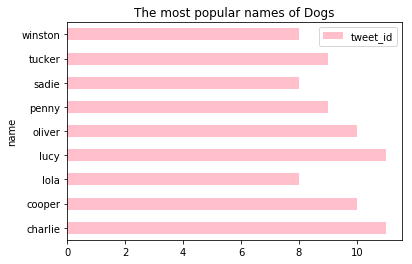

In [319]:
master.groupby('name').count()[['tweet_id']].query('tweet_id >= 8').plot(kind = 'barh', color='pink')
plt.title('The most popular names of Dogs')

Text(0,0.5,'')

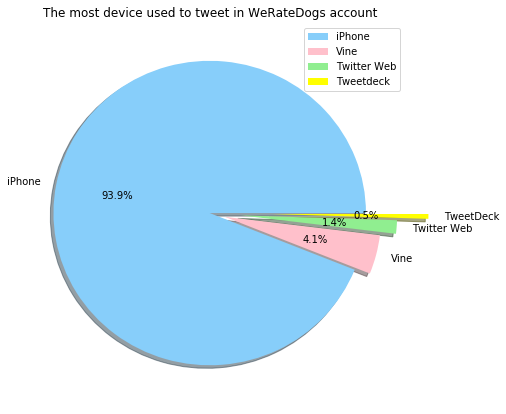

In [320]:
#master.groupby('source').count()
execlude = (0,0.1,0.2,0.4)
colors = ['lightskyblue', 'pink', 'lightgreen', 'yellow']
master.source.value_counts().plot(kind = 'pie', figsize=(7,7),explode = execlude, autopct='%1.1f%%',colors= colors ,shadow = True)
plt.title('The most device used to tweet in WeRateDogs account')
plt.legend(['iPhone',"Vine" , "Twitter Web", "Tweetdeck"] , loc="upper right")
plt.ylabel("")

Text(0.5,1,'The Most rated breed')

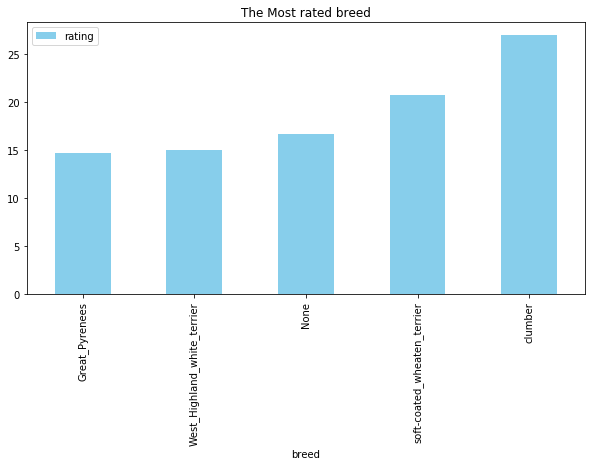

In [321]:
breed_rating = master.query('breed == breed')[['rating', 'breed']].groupby('breed').mean() * 10
breed_rating.sort_values(by=['rating']).tail(5).plot.bar(figsize=(10,5), color = 'skyblue')
plt.title('The Most rated breed')

In [322]:
master[['breed','retweet_count', 'favorite_count','rating']].sort_values('retweet_count', ascending = False).head()

,breed,retweet_count,favorite_count,rating
1037,Labrador_retriever,79515.0,131075.0,1.3
259,Chihuahua,56625.0,0.0,NaN
533,Chihuahua,56625.0,107015.0,1.3
816,NaN,52360.0,0.0,NaN
1077,Eskimo_dog,52360.0,75163.0,1.3
